# Computer Vision - P1

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented. 

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P1_Student1_Student2.zip** that includes:
    - The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 2nd, 23:00 h** 

## Practicum 1: Basics on Image Processing and Manipulation

The main topics are:
1. Image loading, saving and creation
2. Color manipulation 

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

Requirement: The code should be,
- optimized ( e.g. do not use 'for' instruction when indexing numpy arrays)
- readable  ( e.g. avoiding the implementation of more than 2 loops within a line)
- commented and with descriptions

### Packages loading 

First, we need to import the required Python packages for basic image manipulation. 

Run the following code:

In [1]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the 
notebook**):

In [2]:
%matplotlib inline

## ----------------------------------------------------------------------------------------------------------


### 1.1 Image creation, saving and loading

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) 
- Create and display a grayscale image that has 150 rows and 200 columns where each value should be of type unsigned integer with 8 bits. 

Size:  (150, 200)


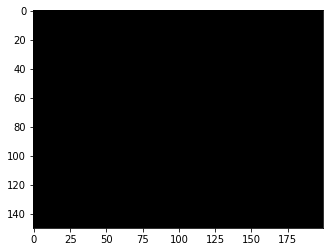

In [3]:
#1st Exercice A: Declaring a variable as a numpy object
#and calling its "zeros" function to create a full black image
# with each element as an 8 bit integer.
arr_ = np.zeros((150, 200), dtype = np.uint8)

plt.imshow(arr_, cmap = "gray")

print("Size: ", np.shape(arr_))

- How many values can have each pixel in this case? 

In [4]:
# In this case the picture has only one value of the gray scale per pixel.

**Solution:** 

This allows us to represent 2^8 = 256 values in each pixel.

b) Change the color of the pixels of the image in such a way that the left half is black (0) and the right half is white (255). Visualize the image and print the values of its first row. 

<img src="images_notebook/solution_11b.png">

Size:  (150, 200)


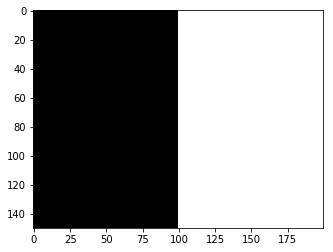

In [5]:
#1st Exercice B: for i in range of the number of rows we paint halve of the rows to black and the other to white using
#the append function.
#That function lets us specify the amount of rows and columns and its pixel value.
#Later on we specify the "uint8" type to pixel's type and we show the imatge and its size.
bw_arr = []
for i in range (150):
    bw_arr.append([0]*100 + [255]*100)

np.array(bw_arr, dtype='uint8')
    
plt.imshow(bw_arr, cmap = "gray")
print("Size: ", np.shape(bw_arr))


c) Use the IO image package to save the image previously created:

In [6]:
# Firstly, We import the input/output from the skimage package and next We save the image with the gray scale.
from skimage import io
io.imsave('images/grayscale_img.bmp',bw_arr, cmap ='gray')


/Users/eduard/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: images/grayscale_img.bmp is a low contrast image
  warn('%s is a low contrast image' % fname)
/Users/eduard/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/Users/eduard/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


b) Load the saved image and visualize it:

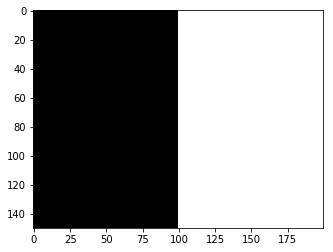

In [7]:
# Using the previously imported I/O, we use it to read the saved image. Because of the saving, when we visualize it
# the image appears as purple and yellow. To solve this, we need the "cmap" parameter stating that it's visualized in
# gray scale. 

img = io.imread('images/grayscale_img.bmp')
plt.imshow(img, cmap ='gray')
plt.show()

## ----------------------------------------------------------------------------------------------------------


### 1.2 Color image manipulation

a) 
- Load and show the image `lenna.jpg`.
- Check its dimensions.

**Note:** Pictures may appear in the figure with pseudocolors. Use (imread,im,cmap='rgb') to display them in RGB color and (imread,im,cmap='gray') to display them in grayscale. For more information, check the color maps available in the documentation.

Shape:  (225, 400, 3)


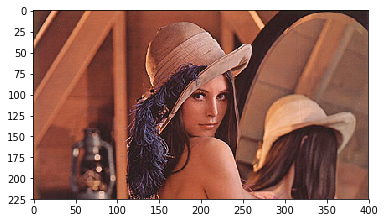

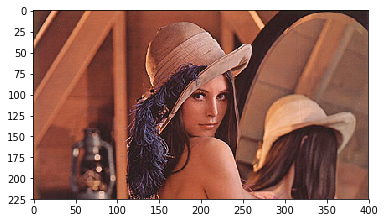

In [8]:


lenna = io.imread('images/lenna.jpg')

print('Shape: ',np.shape(lenna))

plt.imshow(lenna, cmap = 'gray')
plt.show()
plt.imshow(lenna, cmap = 'hot_r') #In RGB using the hot_r filter/map.

b) Convert the previous image to grayscale, and visualize and save it. Note that there are 2 different solutions for the conversion.

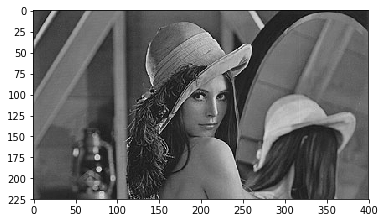

In [62]:
from skimage.color import rgb2gray
lenna_gray = rgb2gray(lenna)
plt.imshow(lenna_gray, cmap='gray')
plt.show()

c) Convert the lena image into a boolean image, by applying a binarization to the grayscale image. This should be done by setting to 0 all values equal or below 100 and to 1 otherwise. Check the range of the values of the image, and print the 10th row.

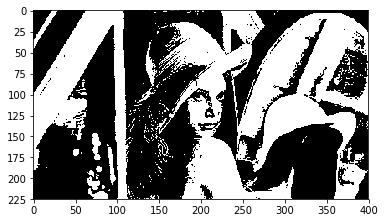

In [60]:
lenna_bin = lenna_gray.copy() #realizamos la copia mas que nada para proteccion de datos.

lenna_bin = lenna_bin*255 #esto pasa los valores de los colores a escala 255 porque estan entre 0 i 1.
lenna_bin = lenna_bin >= 100 #Entonces cuando los numeros, ahora en la escala anterior, superan o igualan a 100 se 
# vuelven true mientras que los otros se vuelven false. De esta manera sale una imagen representada por una matriz
# booleana. Al mostrarla aparece la imagen en unicamente 0 o 255, es decir, blanco o negro, sin grises intermedios.

plt.imshow(lenna_bin, cmap='gray')
plt.show()

d) Visualize in the same figure three images: (1) the original image, (2) the graylevel image, and (3) the binarized image. Set the corresponding titles of the images.

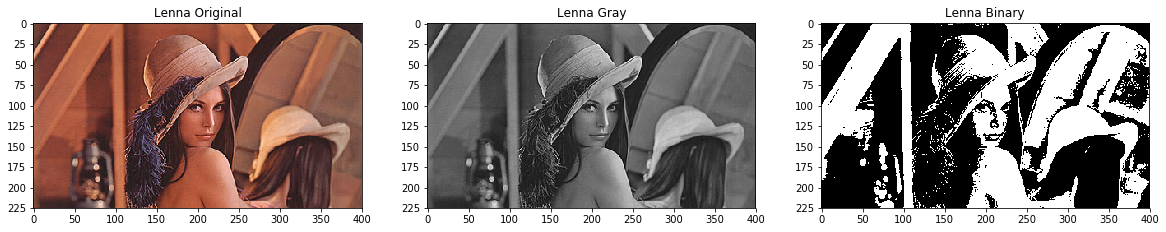

In [74]:
f,lenna_all = plt.subplots(ncols = 3,nrows = 1,figsize=(20,10))

lenna_all[0].imshow(lenna)
lenna_all[0].set_title('Lenna Original')
lenna_all[1].imshow(lenna_gray,cmap='gray')
lenna_all[1].set_title('Lenna Gray')
lenna_all[2].imshow(lenna_bin,cmap='gray')
lenna_all[2].set_title('Lenna Binary')
plt.show()

## ----------------------------------------------------------------------------------------------------------


### 1.3 Images manipulation

a) Add a black frame to Lenna's image. It should have a width of 1/10th of the height of the original image. 

(We recommend to create a bigger black image to later embed the original image in the central part)

<img src="images_notebook/lena_frame.png">

b) 
- Change the mask of the framed image to red. 
- Visualize the three images with their respective titles.

## ----------------------------------------------------------------------------------------------------------

### 1.4 Masks and logical image manipulation

- Import/read the image `circles.bmp` (see figure top) 

- Define 3 images in such a way that each one contains only 1 ball (see figure bottom). Balls should be extracted by defining their grey value range.

- Visualize the 3 images in the same figure (e.g. plt.subplots(ncols=3, figsize=(10,20))). Add titles to the figures

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

## ----------------------------------------------------------------------------------------------------------


### 1.5 Color manipulation

a) 

- Create and visualize the three images shown in the following figure:
<img src="./images_notebook/ex17a.png">

- Using these three images, construct the following color image:
<img src='./images_notebook/ex17b.png'>

b) 

- Read and visualize the image `sillas.jpg` (see figure top). 
- Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/ex17c.png">

<img src="images_notebook/ex17c2.png">



- Construct and visualize a new image in which the red color of the chairs is changed to blue (see figure).
<img src="images_notebook/ex17c3.png">

c) 

- Given the images `coat.png` and `model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). 

- Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying resize, rotate, etc. keep track how the image type and values range change. When necessary, apply type conversion using img_as_float, img_as_uint, img_as_ubyte.